In [ ]:
import os
import random
import numpy as np, pandas as pd
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as T
import torchvision.datasets as datasets
from torchvision.io import read_image

from matplotlib import pyplot as plt
from pathlib import Path
from PIL import Image

torch.manual_seed(42)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Unzipping

In [ ]:
#Extracting the zip files from the dataset

# Put on the same directory
from zipfile import ZipFile 
  
# specifying the name of the zip file
file = "/content/drive/MyDrive/Colab Notebooks/Image_Proc/processed.zip"
  
# open the zip file in read mode
with ZipFile(file, 'r') as z: 
    # list all the contents of the zip file
    z.printdir()
    # extract all files
    print('extraction...') 
    z.extractall() 
    print('Done!')

Streaming output truncated to the last 5000 lines.
images/train/80321.jpg                         2023-03-24 19:30:12       453679
images/train/80322.jpg                         2017-03-30 23:05:04        56360
images/train/80330.jpg                         2023-03-20 17:08:36        39172
images/train/80390.jpg                         2023-03-20 17:08:36        24269
images/train/80392.jpg                         2017-03-30 23:05:04       119669
images/train/80401.jpg                         2023-03-24 19:30:12       142346
images/train/80411.jpg                         2023-03-24 19:30:12       843767
images/train/8042.jpg                          2017-03-30 23:02:44        79598
images/train/80422.jpg                         2017-03-30 23:05:04        34409
images/train/8043.jpg                          2017-03-30 23:08:04        29206
images/train/80440.jpg                         2023-03-20 17:08:36       151662
images/train/80442.jpg                         2017-03-30 23:05:04   

# Image Visualization for Pre-processing

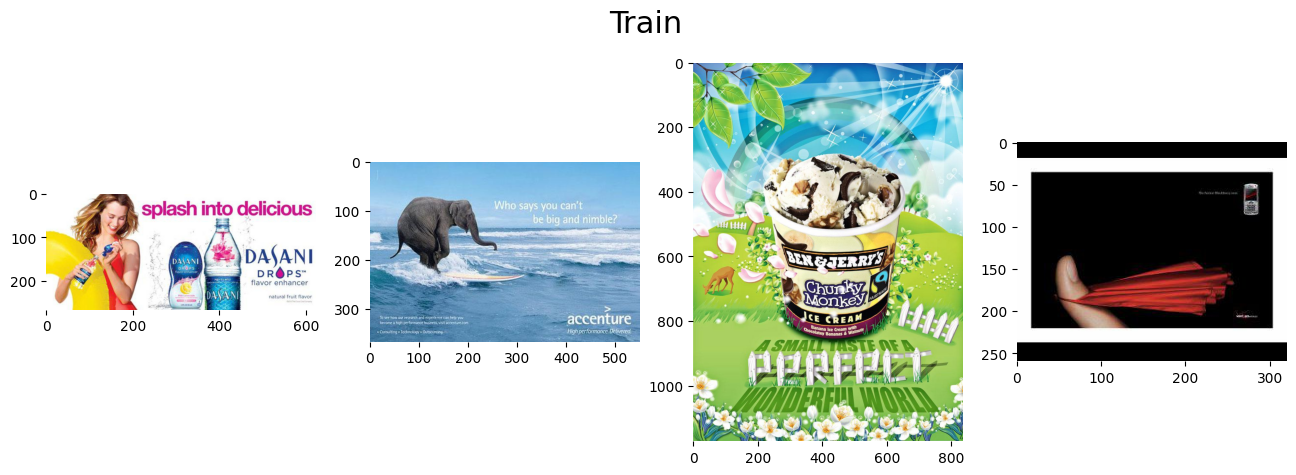

In [ ]:
train = '/content/images/train/'
img_path_train = os.listdir(train)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Train", size=22)

for i,image in enumerate(img_path_train[:4]):
    img = read_image(train + image)
    img = T.ToPILImage()(img)
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
fig.show()

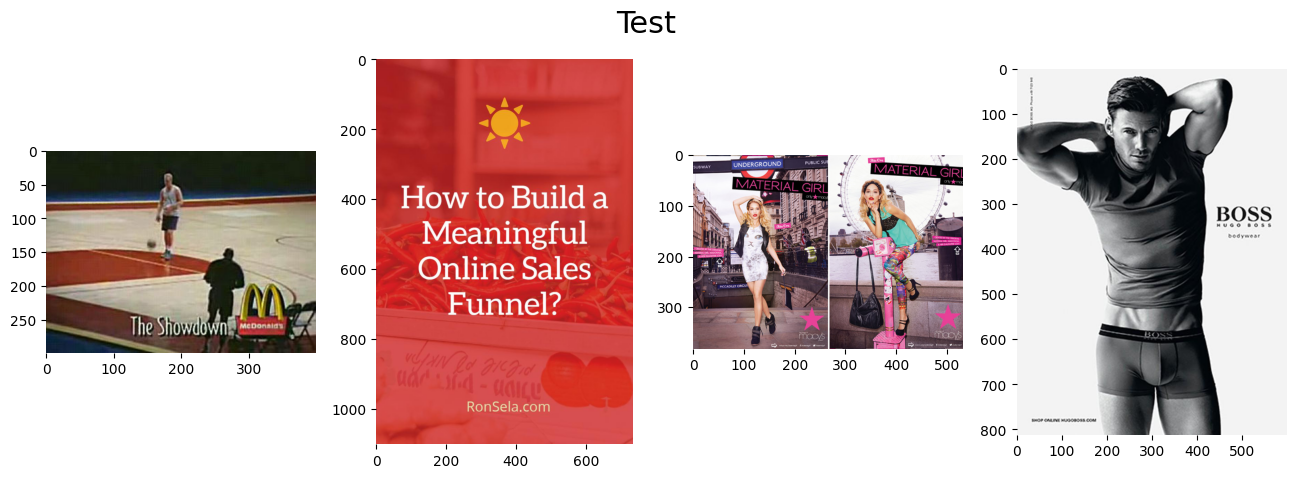

In [ ]:
test = '/content/images/test/'
img_path_test = os.listdir(test)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Test", size=22)

for i,image in enumerate(img_path_test[:4]):
    img = read_image(test + image)
    img = T.ToPILImage()(img)
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
fig.show()

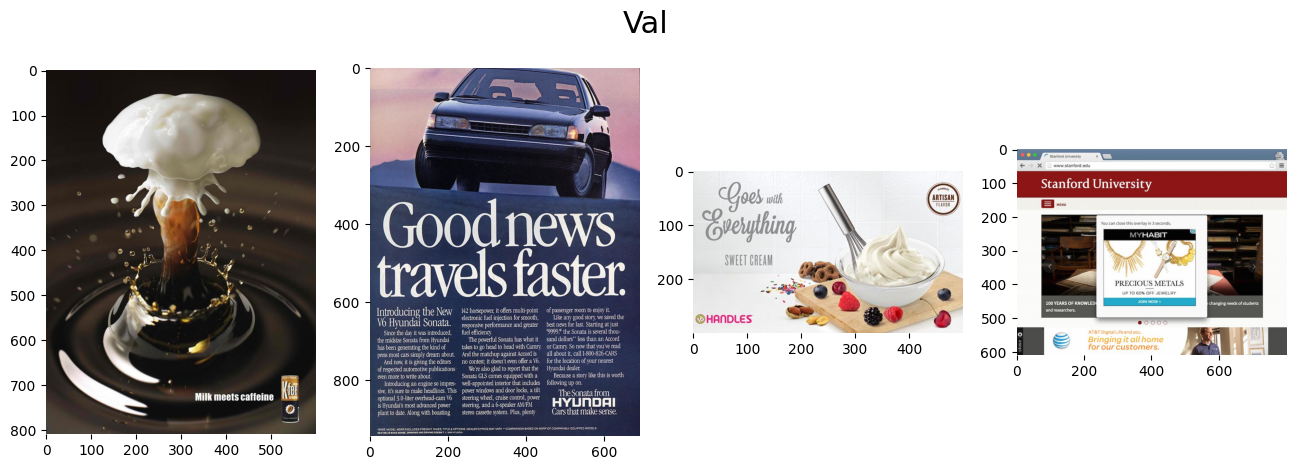

In [ ]:
val = '/content/images/val/'
img_path_val = os.listdir(val)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Val", size=22)

for i,image in enumerate(img_path_val[:4]):
    img = read_image(val + image)
    img = T.ToPILImage()(img)
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
fig.show()

### Image plotting function

In [ ]:
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]
    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap = 'gray', **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.tight_layout()

plt.rcParams["figure.figsize"] = (20,3)

### Single Transform done to compare Orignal Image with Final Image

In [ ]:
orig_img = Image.open(train + img_path_train[0])
# orig_img_train = T.ToPILImage()(orig_img)

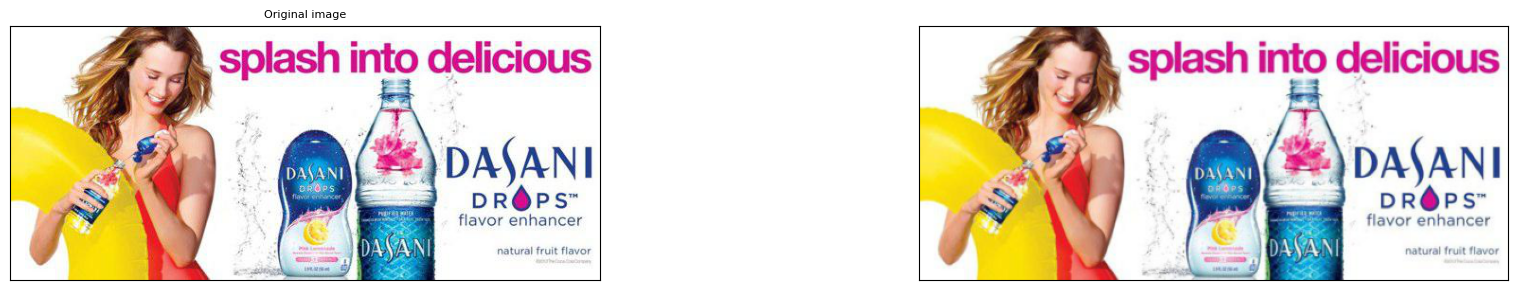

In [ ]:
# Simple Transform applied to Resize
train_resize = transforms.Compose([transforms.Resize(224)])
resized_images = [train_resize(orig_img) for _ in range(1)]
plot(resized_images)

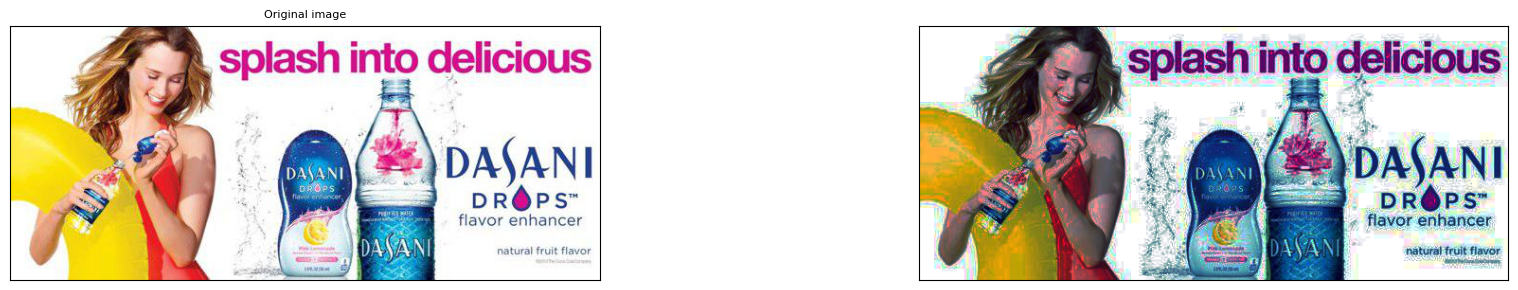

In [ ]:
# Simple Transform applied for Histogram Equalization
blurred_imgs = [transforms.functional.equalize(orig_img) for _ in range(1)]
plot(blurred_imgs)

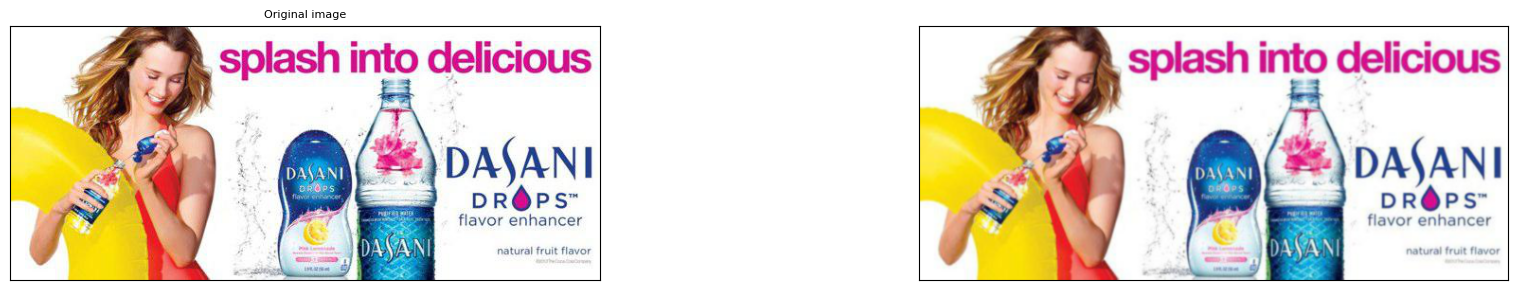

In [ ]:
# Simple Transform Applied for Gaussian Blur
train_gaussian_blurrer = transforms.GaussianBlur(kernel_size=(5,5), sigma=0.7)
gaussian_blurred_images = [train_gaussian_blurrer(orig_img) for _ in range(1)]
plot(gaussian_blurred_images)

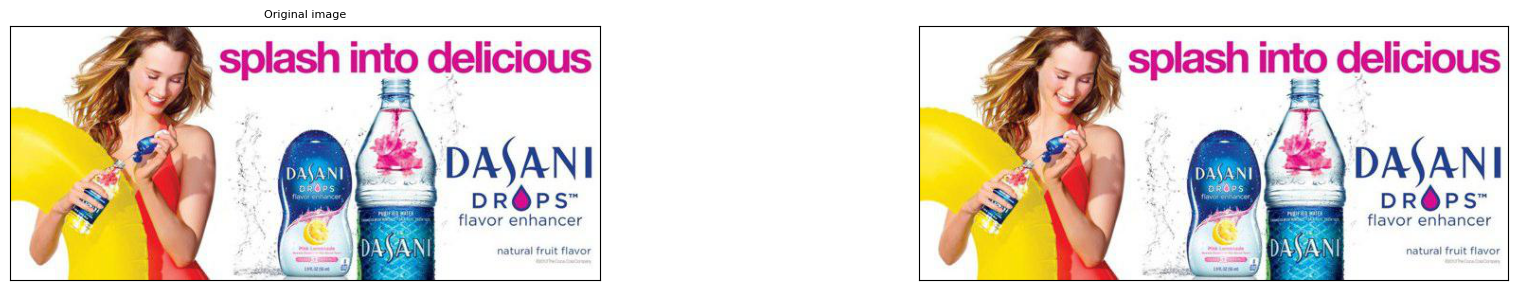

In [ ]:
# simple transform applied for changing contrast 
train_contrast = transforms.RandomAutocontrast()
contrast_images = [train_contrast(orig_img) for _ in range(1)]
plot(contrast_images)

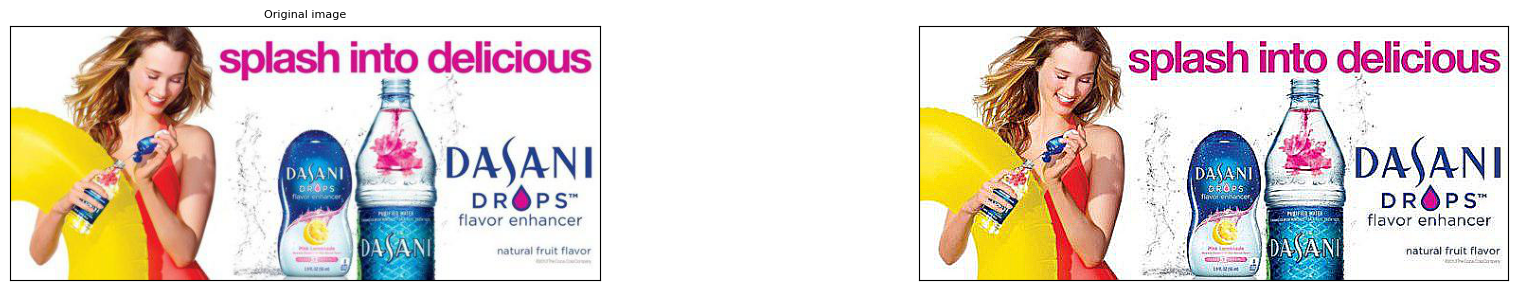

In [ ]:
# simple transform applied for auto-sharpness

train_sharpness_adjuster= T.RandomAdjustSharpness(sharpness_factor=5)
sharpened_imgs = [train_sharpness_adjuster(orig_img) for _ in range(1)]
plot(sharpened_imgs)

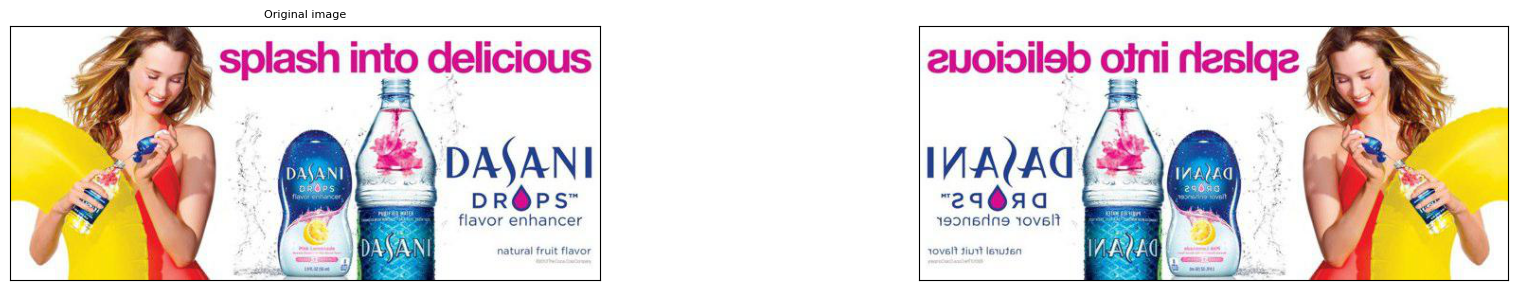

In [ ]:
# simple transform applied for horizontal flips
train_hflip = transforms.RandomHorizontalFlip(p=0.8)
transformed_imgs = [train_hflip(orig_img) for _ in range(1)]
plot(transformed_imgs)

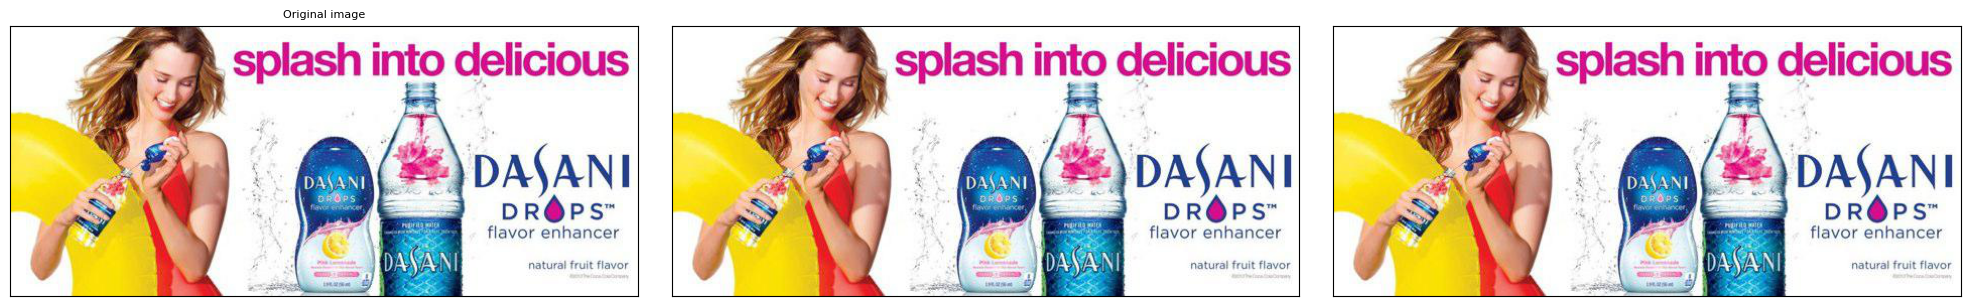

In [ ]:
# Functional transform applied for adjusting Brightness to a value
train_brightness = T.functional.adjust_brightness(orig_img, 1)
brightened_imgs = [orig_img, train_brightness]
plot(brightened_imgs)

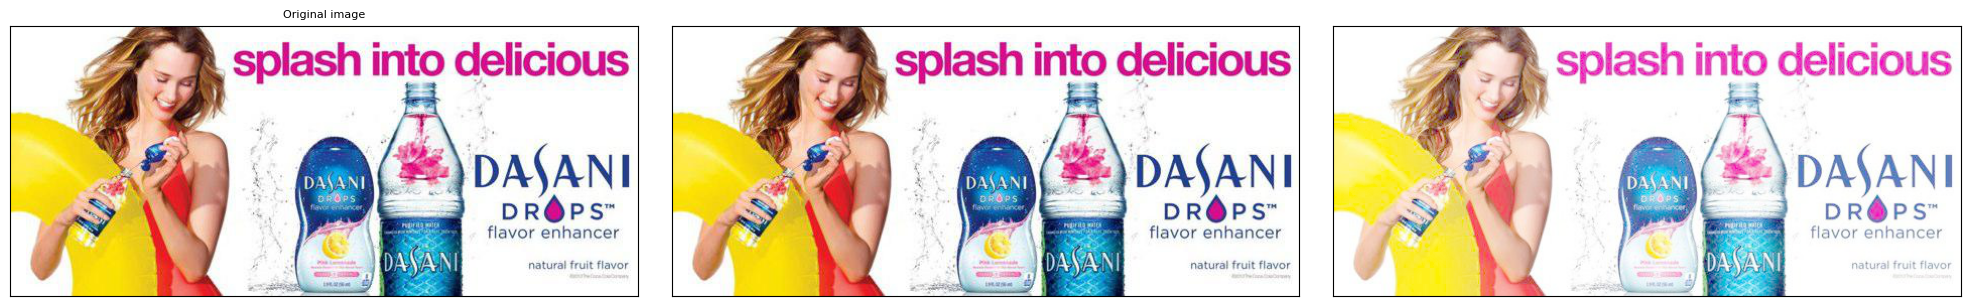

In [ ]:
# Functional transform applied for adjusting gamma to a value
train_gamma = T.functional.adjust_gamma(orig_img, 0.5, 1 ) # gamma greater than 1 will make shadows darker, while gamma smaller than 1 make dark regions lighter.
gamma_imgs = [orig_img, train_gamma]
plot(gamma_imgs)

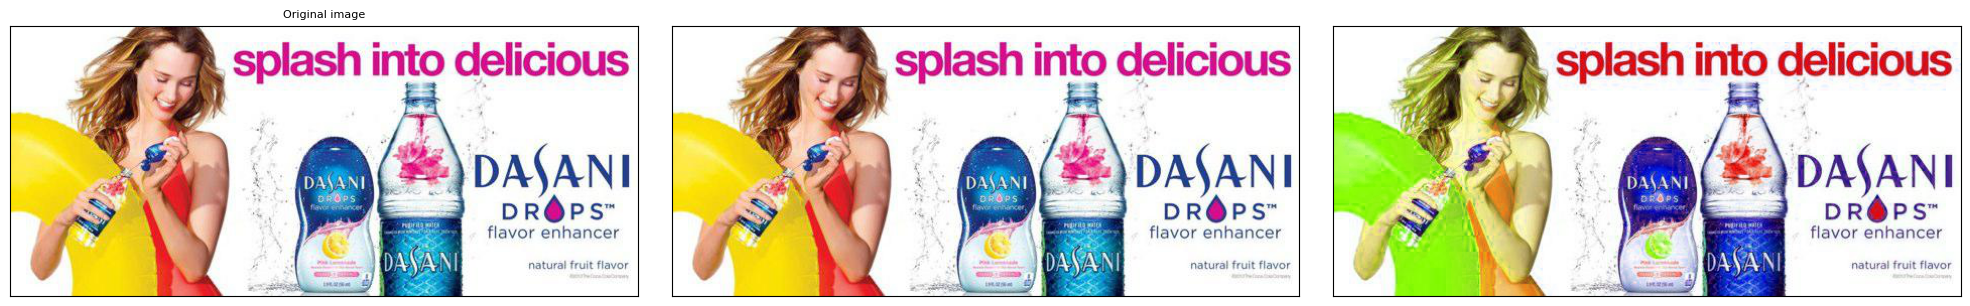

In [ ]:
# Functional transform applied for adjusting hue to a value
train_hue = T.functional.adjust_hue(orig_img, 0.1) # Must be in the interval [-0.5, 0.5]. 0 means no shift.
hue_imgs = [orig_img, train_hue]
plot(hue_imgs)

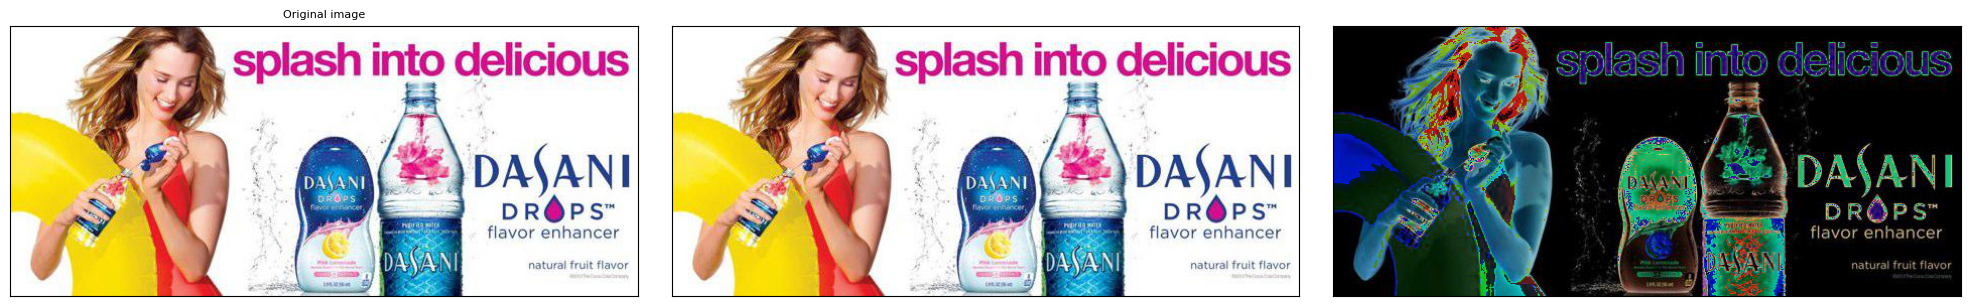

In [ ]:
# Functional transform applied for solarizing values that is inverting all pixel values above a threshold.
train_solarize = T.functional.solarize(orig_img, 50)
solarize_imgs = [orig_img, train_solarize]
plot(solarize_imgs)

## Visualization

In [ ]:
img_path = "/content/images/train/100850.jpg"

In [ ]:
# Before Transform
im1 = read_image(img_path, mode=torchvision.io.ImageReadMode.GRAY)

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], dtype=torch.uint8)

In [41]:
# After Transform
img_visual = Image.open(img_path)
im2 = T.functional.adjust_hue(img_visual, 0.1)

AttributeError: ignored

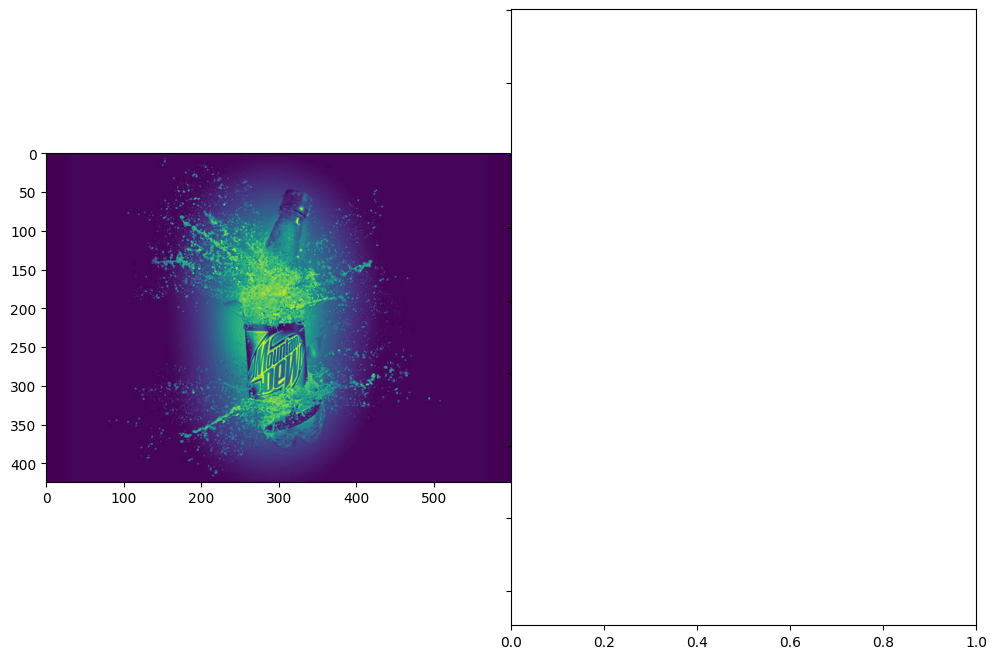

In [45]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(1, 2, hspace=0, wspace=0)
ax1, ax2 = gs.subplots(sharex='col', sharey='row')

ax1.imshow(np.transpose(im1.numpy(), (1, 2, 0)))
ax2.imshow(np.transpose(im2.numpy(), (1, 2, 0)))

ax1.title.set_text('Before Pre-processing')
ax2.title.set_text('After Pre-processing')

ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_yticklabels([])
ax1.set_xticklabels([])

ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_yticklabels([])
ax2.set_xticklabels([])

ax1.patch.set_edgecolor('black')  
ax1.patch.set_linewidth('1')  
# fig.savefig("comparison_of_covid_pneumonia_normal.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)